#項3 幾何光学

**例題3.1 デカルトの卵形**

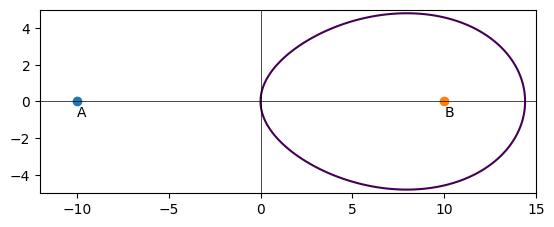

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n1 = 1.0
n2=1.5
a=10.0
b=12.0

delta=0.025
xrange=np.arange(-10, 15, 0.01)
yrange=np.arange(-10, 10, 0.01)
X, Y = np.meshgrid(xrange, yrange)

plt.axis([-12, 15, -5, 5])
plt.gca().set_aspect('equal', adjustable='box')
Z=n1*np.sqrt((X+a)**2+Y**2)+n2*np.sqrt((X-b)**2+Y**2)-(n1*a+n2*b)
plt.contour(X, Y, Z, [0.0])
plt.plot(-10.0, 0.0, 'o')
plt.plot(10.0, 0.0, 'o')
plt.plot([-12.0, 15.0], [0.0, 0.0], 'k-', linewidth=0.5)
plt.plot([0.0, 0.0], [-5.0, 5.0], 'k-', linewidth=0.5)
plt.text(-10.0, -0.8, "A")
plt.text(10.0, -0.8, "B")
plt.savefig("descart_egg", dpi=400)

In [ ]:
from sympy import Matrix, symbols

**例題3.3 レンズの行列**

In [ ]:
p1, p2, n2, T = symbols('p1 p2 n2 T')

RM1 = Matrix([[1, -p1], [0, 1]])
RM2 = Matrix([[1, -p2], [0, 1]])
TM = Matrix([[1, 0], [T, 1]])
SM = RM2 * TM * RM1
print(SM)

Matrix([[-T*p2 + 1, -p1*(-T*p2 + 1) - p2], [T, -T*p1 + 1]])


**例題3.4 結像系行列**

In [ ]:
a, b, c, d, L1, L2 = symbols('a b c d L1 L2')

T1 = Matrix([[1, 0], [-L1, 1]])
SM = Matrix([[b, -a], [-d, c]])
T2= Matrix([[1, 0], [L2, 1]])
L = T2 * SM * T1
print(L)

Matrix([[L1*a + b, -a], [-L1*(-L2*a + c) + L2*b - d, -L2*a + c]])


**例題3.6 球レンズ**

In [ ]:
from sympy import symbols, Matrix, simplify
from sympy.abc import a, b, c, d

r, n, p1, p2, T, f, lH1, lH2 = symbols('r n p1 p2 T f lH1 lH2')

T = 2 * r / n
p1 = (n - 1) / r
p2 = -(1 - n) / r
RM1 = Matrix([[1, -p1], [0, 1]])
RM2 = Matrix([[1, -p2], [0, 1]])
TM = Matrix([[1, 0], [T, 1]])
SM = RM2 * TM * RM1
SM = simplify(SM)
print(SM)

a = -SM[0, 1]
b = SM[0, 0]
c = SM[1, 1]
d = -SM[1, 0]

lH1 = (1 - b) / a
lH2 = (c - 1) / a
lH1 = simplify(lH1)
lH2 = simplify(lH2)

print(lH1, lH2)


Matrix([[(2 - n)/n, 2*(1 - n)/(n*r)], [2*r/n, (2 - n)/n]])
r -r


**例題3.7 組合せレンズ**

In [ ]:
from sympy import symbols, Matrix

a1, b1, c1, d1, t1 = symbols("a1 b1 c1 d1 t1")
a2, b2, c2, d2, t2, t = symbols("a2 b2 c2 d2 t2 t")
S1 = Matrix([[b1, -a1], [-d1, c1]])
T = Matrix([[1, 0], [t, 1]])
S2 = Matrix([[b2, -a2], [-d2, c2]])
S = S2 * T * S1
print(S)

Matrix([[a2*d1 + b1*(-a2*t + b2), -a1*(-a2*t + b2) - a2*c1], [b1*(c2*t - d2) - c2*d1, -a1*(c2*t - d2) + c1*c2]])


**例題3.9 光共振器**

In [ ]:
from sympy import symbols, Matrix

r1, r1, d, g1, g2 = symbols("r1 r2 d g1 g2")

R1 = Matrix([[1, 2*(g1 - 1) / d], [0, 1]])
R2 = Matrix([[1, 2*(g2 - 1) / d], [0, 1]])
D = Matrix([[1, 0], [d, 1]])
S = R1 * D * R2 * D
Seigen = S.eigenvals()
print(Seigen)

{2*g1*g2 - 2*sqrt(g1*g2*(g1*g2 - 1)) - 1: 1, 2*g1*g2 + 2*sqrt(g1*g2*(g1*g2 - 1)) - 1: 1}


Text(0, 0.5, '$\\lambda_1$')

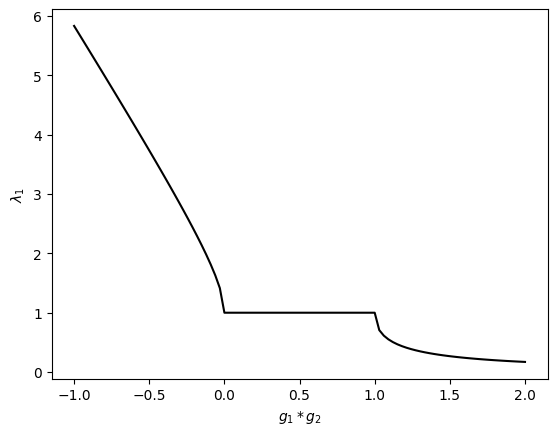

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

N = 100
x = np.linspace(-1, 2, N)
y = np.zeros(N)
for i in range(N):
  if (2 * x[i] - 1)**2 - 1 >= 0:
    y[i] = np.abs(2 * x[i] - 1 - np.sqrt((2 * x[i] - 1)**2 - 1))
  else:
    #書籍:np.complex ⇒ complexに変更
    y[i] = np.abs(2 * x[i] - 1 - complex(0, np.sqrt(1 - (2 * x[i] - 1)**2)))

fig, ax = plt.subplots()
ax.plot(x, y, c="k")
ax.set_xlabel("$g_1 * g_2$")
ax.set_ylabel("$\lambda_1$")

**プログラム3.1**

<ipython-input-10-704e31f5a7ad>:12: RuntimeWarning: invalid value encountered in divide
  s1 = r - r * n0 * np.sin(i0) / (n1 * np.sin(u0 + i1 - i0))


Text(0, 0.5, "s'")

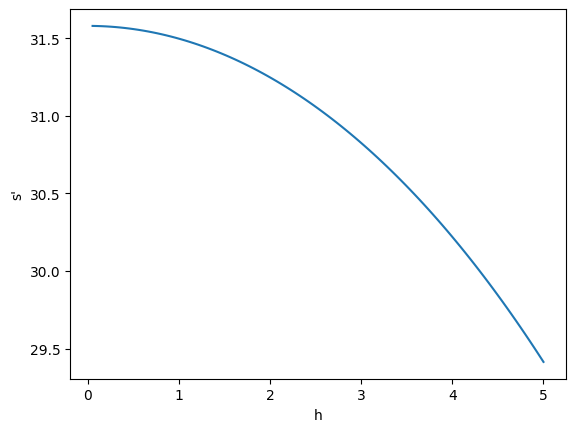

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

h = np.linspace(0, 5, 100)
n0 = 1.0
n1 = 1.5
r = 10
s0 = -400
u0 = np.arctan(h / -s0)
i0 = np.arcsin((-s0 + r) * np.sin(u0) / r)
i1 = np.arcsin(n0 / n1 * np.sin(i0))
s1 = r - r * n0 * np.sin(i0) / (n1 * np.sin(u0 + i1 - i0))


fig, ax = plt.subplots()
ax.plot(h, s1)
ax.set_xlabel("h")
ax.set_ylabel("s'")

# 項4 波動としての光

**例題4.1のプログラム**

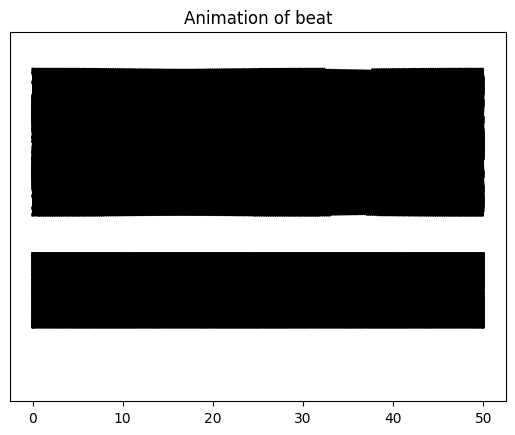

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

def wave(z, t, k, omega):
  return np.cos(k * z - omega * t)

fig, ax = plt.subplots()
anim = []

k1 = 5
k2 = 5.5
omega1 = 10
omega2 = 11

z = np.linspace(0, 50, 500)
for i in range(100):
  time = i / 10.0
  u = wave(z, time, k1, omega1) + wave(z, time, k2, omega2) + 2
  image1 = ax.plot(z, u, color="black")
  u = wave(z, time, k1, omega1) - 2
  image2 = ax.plot(z, u, color="black")
  plt.title("Animation of beat")
  plt.ylim(-5, 5)
  plt.yticks([])
  anim.append(image1 + image2)

anim = animation.ArtistAnimation(fig, anim, interval=100)
plt.show()

#項5 波動光学

**例題5.1 のプログラム**

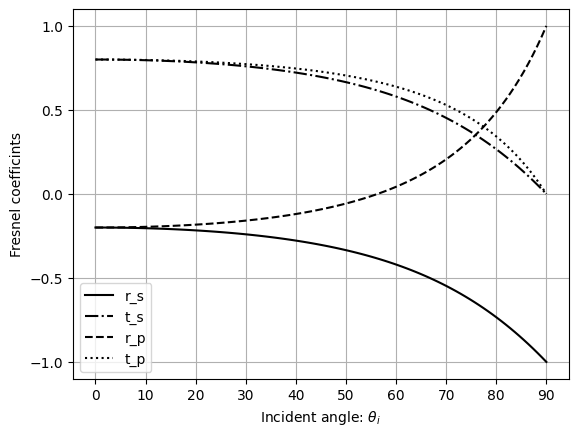

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def rs(theta, ni, nt):
  costheta = np.sqrt(1 - (ni * np.sin(theta) / nt)**2)
  return (ni * np.cos(theta) - nt * costheta) / (ni * np.cos(theta) + nt * costheta)

def ts(theta, ni, nt):
  costheta = np.sqrt(1 - (ni * np.sin(theta) / nt)**2)
  return (2 * ni * np.cos(theta)) / (ni * np.cos(theta) + nt * costheta)

def rp(theta, ni, nt):
  costheta = np.sqrt(1 - (ni * np.sin(theta) / nt)**2)
  return (ni * costheta - nt * np.cos(theta)) / (ni * costheta + nt * np.cos(theta))

def tp(theta, ni, nt):
  costheta = np.sqrt(1 - (ni * np.sin(theta) / nt)**2)
  return (2 * ni * np.cos(theta)) / (ni * costheta + nt * np.cos(theta))

ni = 1
nt = 1.5

theta = np.linspace(0, np.pi / 2, 101)

fig, ax = plt.subplots()

ax.plot(np.degrees(theta), rs(theta, ni, nt), "-k", label="r_s")
ax.plot(np.degrees(theta), ts(theta, ni, nt), "-.k", label="t_s")
ax.plot(np.degrees(theta), rp(theta, ni, nt), "--k", label="r_p")
ax.plot(np.degrees(theta), tp(theta, ni, nt), ":k", label="t_p")
ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
ax.set_yticks([-1.0, -0.5, 0, 0.5, 1.0])
ax.set_xlabel("Incident angle: $\u03b8_i$")
ax.set_ylabel("Fresnel coefficints")
ax.grid()
ax.legend(loc="lower left")
fig.savefig("fresnel_coeffs.png")

**例題5.2 のプログラム**

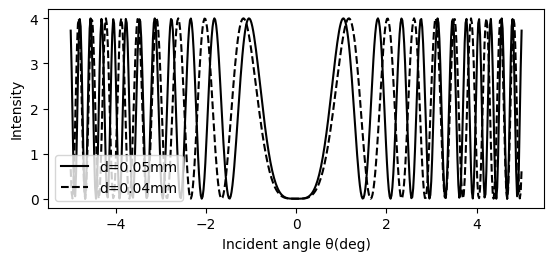

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fringe(theta, w_length, n, d):
  return 4 * np.sin((2 * np.pi * n * d * np.cos(theta)) / w_length) ** 2

w_length = 0.5e-6
n = 1.5
d1 = 0.5e-3
d2 = 0.4e-3

angle = np.linspace(-5, 5, 500)
theta = np.radians(angle)

fig, ax = plt.subplots()
ax.plot(angle, fringe(theta, w_length, n, d1), "-k", label="d=0.05mm")
ax.plot(angle, fringe(theta, w_length, n, d2), "--k", label="d=0.04mm")
ax.set_aspect(1)
ax.set_xlabel("Incident angle \u03b8(deg)")
ax.set_ylabel("Intensity")
ax.legend(loc="lower left")
fig.savefig("fringe_haidinger.png")

**例題5.3 多光束干渉**

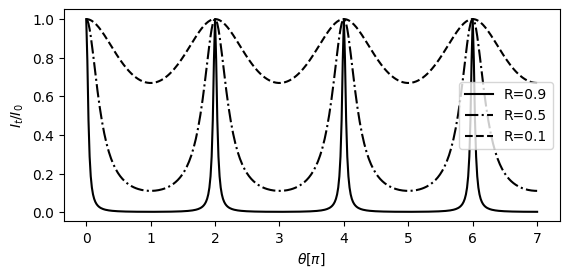

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def T(delta, R):
  return (1-R)**2 / ((1-R)**2 + 4 * R * np.sin(delta * np.pi / 2)**2)

delta = np.linspace(0, 7, 400)

fig, ax = plt.subplots()
ax.plot(delta, T(delta, 0.9), "-k", label="R=0.9")
ax.plot(delta, T(delta, 0.5), "-.k", label="R=0.5")
ax.plot(delta, T(delta, 0.1), "--k", label="R=0.1")
ax.legend()
ax.set_aspect(3)
ax.set_xlabel(r"$\theta [\pi]$")
ax.set_ylabel(r"$I_t/I_0$")
fig.savefig("multi_beam.png")

**例題5.4 二層反射防止膜**

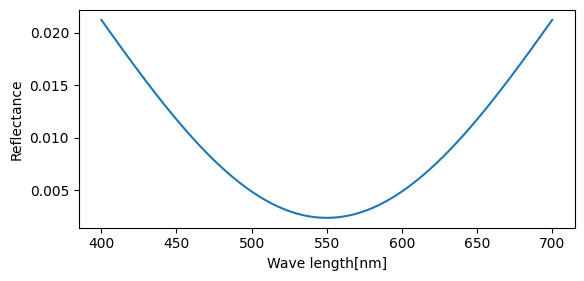

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def M0(wlen, Y):
  wlen0 = 550
  delta = np.pi / 2 * wlen / wlen0
  return np.array([[np.cos(delta), 1J * np.sin(delta)/Y], [1j * Y * np.sin(delta), np.cos(delta)]])

N = 200
wlen = np.linspace(400, 700, N)
n0=1; n1=1.38; n2=1.62; ng=1.52

Y0 = n0
Y1 = n1
Y2 = n2
Yg = ng

R = []

for w in wlen:
  M = M0(w, Y1) @ M0(w, Y2)
  m11 = M[0, 0]
  m12 = M[0, 1]
  m21 = M[1, 0]
  m22 = M[1, 1]
  r = (Y0 * (m11 + Yg * m12) - (m21 + Yg * m22)) / (Y0 * (m11 + Yg * m12) + (m21 + Yg * m22))
  r2 = np.abs(r)**2
  R.append(r2)

fig, ax = plt.subplots()
ax.plot(wlen, R)
ax.set_aspect(700/0.1)
ax.set_xlabel("Wave length[nm]")
ax.set_ylabel("Reflectance")
fig.savefig("two_layer.png")

**例題5.5 多層膜反射**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 特性行列の定義
def M0(wlen, Y):
  wlen0 = 550
  delta = np.pi / 2 * wlen / wlen0
  return np.array([[np.cos(delta), 1J * np.sin(delta)/Y], [1j * Y * np.sin(delta), np.cos(delta)]])

N = 200
wlen = np.linspace(400, 700, N)
n0=1; n1=1.38; n2=1.62; ng=1.52

Y0 = n0
Y1 = n1
Y2 = n2
Yg = ng

R = []

for w in wlen:
  M = M0(w, Y1) @ M0(w, Y2)
  m11 = M[0, 0]
  m12 = M[0, 1]
  m21 = M[1, 0]
  m22 = M[1, 1]
  r = (Y0 * (m11 + Yg * m12) - (m21 + Yg * m22)) / (Y0 * (m11 + Yg * m12) + (m21 + Yg * m22))
  r2 = np.abs(r)**2
  R.append(r2)

fig, ax = plt.subplots()
ax.plot(wlen, R)
ax.set_aspect(700/0.1)
ax.set_xlabel("Wave length[nm]")
ax.set_ylabel("Reflectance")
fig.savefig("two_layer.png")